# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
#!pip -q  install ./python

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import time
import sys
import pickle
from collections import deque
from multiagents import MultiAgents;

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="Tennis", no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [6]:
NUM_STATES = env_info.vector_observations.shape[1];
NUM_ACTIONS = brain.vector_action_space_size;
NUM_AGENTS = len(env_info.agents)
BATCH_SIZE = 128

NUM_STATES, NUM_ACTIONS, NUM_AGENTS

(24, 2, 2)

In [7]:
from multiagents import MultiAgents
agent = MultiAgents(num_agents=2, state_size=NUM_STATES, action_size=NUM_ACTIONS, random_seed=10)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [7]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
agent = MultiAgents(num_agents = 2, state_size=NUM_STATES, action_size=NUM_ACTIONS, random_seed=10)

In [9]:
def multi_ddpg(n_episodes=5000, max_t=2000):
    init_time = time.time();
    scores_deque = deque(maxlen=100);
    scores = []
    max_score = -np.Inf;
    
    for i_episode in range(1, n_episodes+1):
        
        ep_init_time = time.time();
        env_info = env.reset(train_mode=True)[brain_name];
        states = env_info.vector_observations;
        
        agent.reset();
        agent_scores = np.zeros(num_agents);
        
        for t_step in range(max_t):
            actions = agent.act(states);
            next_env_info = env.step(actions)[brain_name];
            
            next_states, rewards, dones = next_env_info.vector_observations, next_env_info.rewards, next_env_info.local_done;
    
            agent.step(states, actions, rewards, next_states, dones);
            
            agent_scores = agent_scores + rewards;
            
            states = next_states;
            
            if np.any(dones):
                break;
            
        best_score = np.max(agent_scores);
        scores_deque.append(best_score);
        scores.append(best_score);
        
        epi_score = np.mean(scores_deque);
        sys.stdout.write('\rEpisode %d\t Done in %.2f/%.2f\t Scores: %s\tAvg Score %.2f'%(i_episode, (time.time() - ep_init_time), (time.time() - init_time), ['%.2f'%sc for sc in agent_scores], np.mean(scores_deque)))
        
        if i_episode % 100 == 0:
            sys.stdout.write('\nEpisode %d\t Done in %.2f/%.2f\t Scores: %s\tAvg Score %.2f'%(i_episode, (time.time() - ep_init_time), (time.time() - init_time), ['%.2f'%sc for sc in agent_scores], np.mean(scores_deque)))

        if i_episode > 100 and epi_score >=0.5:
            
            if epi_score > max_score:
                max_score = epi_score;            
                agent.save(i_episode);

            sys.stdout.write('\nEnvironment Solved: %d\t Done in %.2f/%.2f\t Scores: %s\tAvg Score %.2f'%(i_episode, (time.time() - ep_init_time), (time.time() - init_time), ['%.2f'%sc for sc in agent_scores], np.mean(scores_deque)))
            
    return scores;

In [10]:
print('Starting to');
scores = multi_ddpg()
scores

Starting to
Episode 100	 Done in 0.39/35.91	 Scores: ['-0.01', '0.00']	Avg Score 0.00
Episode 200	 Done in 0.39/73.01	 Scores: ['0.00', '-0.01']	Avg Score 0.00
Episode 300	 Done in 0.36/110.02	 Scores: ['-0.01', '0.00']	Avg Score 0.00
Episode 400	 Done in 0.39/147.00	 Scores: ['0.00', '-0.01']	Avg Score 0.00
Episode 500	 Done in 0.83/187.48	 Scores: ['-0.01', '0.10']	Avg Score 0.01
Episode 600	 Done in 0.36/239.95	 Scores: ['-0.01', '0.00']	Avg Score 0.03
Episode 700	 Done in 0.37/279.89	 Scores: ['-0.01', '0.00']	Avg Score 0.01
Episode 800	 Done in 0.40/320.91	 Scores: ['0.00', '-0.01']	Avg Score 0.01
Episode 900	 Done in 0.37/369.39	 Scores: ['-0.01', '0.00']	Avg Score 0.02
Episode 1000	 Done in 0.40/412.95	 Scores: ['0.00', '-0.01']	Avg Score 0.01
Episode 1100	 Done in 0.80/462.56	 Scores: ['0.10', '-0.01']	Avg Score 0.02
Episode 1200	 Done in 0.81/511.46	 Scores: ['0.10', '-0.01']	Avg Score 0.02
Episode 1300	 Done in 0.41/554.85	 Scores: ['-0.01', '0.00']	Avg Score 0.01
Episode 140

Episode 2321	 Done in 3.15/2162.53	 Scores: ['0.18', '0.30']	Avg Score 0.56vg Score 0.57
Episode 2322	 Done in 1.47/2164.00	 Scores: ['0.10', '0.09']	Avg Score 0.53g Score 0.56
Episode 2323	 Done in 0.90/2164.90	 Scores: ['-0.01', '0.10']	Avg Score 0.54 Score 0.53
Episode 2324	 Done in 0.87/2165.77	 Scores: ['0.00', '0.09']	Avg Score 0.53vg Score 0.54
Episode 2325	 Done in 4.51/2170.28	 Scores: ['0.29', '0.40']	Avg Score 0.53g Score 0.53
Episode 2326	 Done in 0.93/2171.21	 Scores: ['0.00', '0.09']	Avg Score 0.53g Score 0.53
Episode 2327	 Done in 0.90/2172.10	 Scores: ['-0.01', '0.10']	Avg Score 0.53 Score 0.53
Episode 2328	 Done in 3.52/2175.63	 Scores: ['0.30', '0.29']	Avg Score 0.53vg Score 0.53
Episode 2329	 Done in 0.91/2176.54	 Scores: ['0.00', '0.09']	Avg Score 0.53g Score 0.53
Episode 2330	 Done in 5.06/2181.60	 Scores: ['0.39', '0.40']	Avg Score 0.51g Score 0.53
Episode 2331	 Done in 4.31/2185.91	 Scores: ['0.40', '0.29']	Avg Score 0.51g Score 0.51
Episode 2332	 Done in 1.54/21

Episode 2450	 Done in 3.04/2930.32	 Scores: ['0.30', '0.19']	Avg Score 0.57g Score 0.57
Episode 2451	 Done in 0.87/2931.19	 Scores: ['-0.01', '0.10']	Avg Score 0.57 Score 0.57
Episode 2452	 Done in 1.47/2932.66	 Scores: ['0.10', '0.09']	Avg Score 0.57vg Score 0.57
Episode 2453	 Done in 0.90/2933.56	 Scores: ['0.10', '-0.01']	Avg Score 0.57 Score 0.57
Episode 2454	 Done in 0.87/2934.42	 Scores: ['-0.01', '0.10']	Avg Score 0.56g Score 0.57
Episode 2455	 Done in 2.23/2936.65	 Scores: ['0.20', '0.09']	Avg Score 0.55vg Score 0.56
Episode 2456	 Done in 0.47/2937.13	 Scores: ['0.00', '-0.01']	Avg Score 0.55 Score 0.55
Episode 2457	 Done in 7.92/2945.05	 Scores: ['0.69', '0.70']	Avg Score 0.56vg Score 0.55
Episode 2458	 Done in 0.85/2945.90	 Scores: ['-0.01', '0.10']	Avg Score 0.56 Score 0.56
Episode 2459	 Done in 1.99/2947.88	 Scores: ['0.20', '0.09']	Avg Score 0.56vg Score 0.56
Episode 2460	 Done in 3.01/2950.89	 Scores: ['0.19', '0.30']	Avg Score 0.56g Score 0.56
Episode 2461	 Done in 0.85/

Episode 2656	 Done in 0.90/4590.60	 Scores: ['0.10', '-0.01']	Avg Score 1.07g Score 1.07
Episode 2657	 Done in 21.78/4612.39	 Scores: ['1.90', '1.99']	Avg Score 1.08g Score 1.07
Episode 2658	 Done in 1.48/4613.87	 Scores: ['0.10', '-0.01']	Avg Score 1.08g Score 1.08
Episode 2659	 Done in 27.30/4641.18	 Scores: ['2.39', '2.40']	Avg Score 1.10g Score 1.08
Episode 2660	 Done in 13.50/4654.68	 Scores: ['1.19', '1.20']	Avg Score 1.09g Score 1.10
Episode 2661	 Done in 3.79/4658.47	 Scores: ['0.29', '0.30']	Avg Score 1.08vg Score 1.09
Episode 2662	 Done in 2.03/4660.50	 Scores: ['0.10', '0.09']	Avg Score 1.08g Score 1.08
Episode 2663	 Done in 17.52/4678.02	 Scores: ['1.50', '1.49']	Avg Score 1.09 Score 1.08
Episode 2664	 Done in 0.88/4678.91	 Scores: ['0.10', '-0.01']	Avg Score 1.09g Score 1.09
Episode 2665	 Done in 0.91/4679.82	 Scores: ['0.10', '-0.01']	Avg Score 1.09g Score 1.09
Episode 2666	 Done in 1.99/4681.81	 Scores: ['0.09', '0.20']	Avg Score 1.09vg Score 1.09
Episode 2667	 Done in 9

Episode 2747	 Done in 12.79/5370.32	 Scores: ['0.99', '1.10']	Avg Score 0.75g Score 0.75
Episode 2748	 Done in 14.29/5384.61	 Scores: ['1.30', '1.19']	Avg Score 0.76g Score 0.75
Episode 2749	 Done in 26.57/5411.18	 Scores: ['2.40', '2.29']	Avg Score 0.78g Score 0.76
Episode 2750	 Done in 4.93/5416.11	 Scores: ['0.39', '0.40']	Avg Score 0.77vg Score 0.78
Episode 2751	 Done in 1.90/5418.02	 Scores: ['0.10', '0.09']	Avg Score 0.77g Score 0.77
Episode 2752	 Done in 1.98/5420.00	 Scores: ['0.09', '0.20']	Avg Score 0.77g Score 0.77
Episode 2753	 Done in 3.73/5423.73	 Scores: ['0.29', '0.30']	Avg Score 0.74g Score 0.77
Episode 2754	 Done in 29.31/5453.04	 Scores: ['2.60', '2.60']	Avg Score 0.76 Score 0.74
Episode 2755	 Done in 3.42/5456.46	 Scores: ['0.29', '0.30']	Avg Score 0.77vg Score 0.76
Episode 2756	 Done in 11.98/5468.44	 Scores: ['0.99', '1.10']	Avg Score 0.78 Score 0.77
Episode 2757	 Done in 1.01/5469.45	 Scores: ['-0.01', '0.10']	Avg Score 0.76g Score 0.78
Episode 2758	 Done in 6.63

Episode 2838	 Done in 0.44/5952.30	 Scores: ['0.00', '-0.01']	Avg Score 0.60g Score 0.61
Episode 2839	 Done in 0.88/5953.18	 Scores: ['0.10', '-0.01']	Avg Score 0.59g Score 0.60
Episode 2840	 Done in 0.42/5953.60	 Scores: ['0.00', '-0.01']	Avg Score 0.58g Score 0.59
Episode 2841	 Done in 7.78/5961.39	 Scores: ['0.70', '0.59']	Avg Score 0.57vg Score 0.58
Episode 2842	 Done in 0.82/5962.21	 Scores: ['0.00', '0.09']	Avg Score 0.57g Score 0.57
Episode 2843	 Done in 2.65/5964.85	 Scores: ['0.20', '0.09']	Avg Score 0.56g Score 0.57
Episode 2844	 Done in 1.49/5966.35	 Scores: ['0.09', '0.10']	Avg Score 0.55g Score 0.56
Episode 2845	 Done in 0.41/5966.75	 Scores: ['0.00', '-0.01']	Avg Score 0.55 Score 0.55
Episode 2846	 Done in 2.06/5968.81	 Scores: ['0.20', '0.09']	Avg Score 0.54vg Score 0.55
Episode 2847	 Done in 3.05/5971.87	 Scores: ['0.19', '0.20']	Avg Score 0.54g Score 0.54
Episode 2848	 Done in 1.52/5973.38	 Scores: ['-0.01', '0.10']	Avg Score 0.52 Score 0.54
Episode 2849	 Done in 0.86/

Episode 3010	 Done in 7.28/7118.04	 Scores: ['0.59', '0.60']	Avg Score 0.80vg Score 0.80
Episode 3011	 Done in 29.53/7147.57	 Scores: ['2.60', '2.60']	Avg Score 0.80 Score 0.80
Episode 3012	 Done in 20.39/7167.97	 Scores: ['1.79', '1.80']	Avg Score 0.81g Score 0.80
Episode 3013	 Done in 7.07/7175.04	 Scores: ['0.60', '0.49']	Avg Score 0.80vg Score 0.81
Episode 3014	 Done in 0.97/7176.01	 Scores: ['-0.01', '0.10']	Avg Score 0.79 Score 0.80
Episode 3015	 Done in 11.60/7187.62	 Scores: ['1.00', '0.99']	Avg Score 0.80g Score 0.79
Episode 3016	 Done in 29.21/7216.83	 Scores: ['2.60', '2.60']	Avg Score 0.82g Score 0.80
Episode 3017	 Done in 11.36/7228.18	 Scores: ['1.00', '0.99']	Avg Score 0.82g Score 0.82
Episode 3018	 Done in 29.21/7257.40	 Scores: ['2.60', '2.60']	Avg Score 0.83g Score 0.82
Episode 3019	 Done in 11.70/7269.10	 Scores: ['0.99', '1.10']	Avg Score 0.84g Score 0.83
Episode 3020	 Done in 3.73/7272.83	 Scores: ['0.30', '0.29']	Avg Score 0.84vg Score 0.84
Episode 3021	 Done in 0

Episode 3101	 Done in 28.21/8384.71	 Scores: ['2.60', '2.60']	Avg Score 1.24g Score 1.23
Episode 3102	 Done in 26.81/8411.52	 Scores: ['2.50', '2.49']	Avg Score 1.24g Score 1.24
Episode 3103	 Done in 6.55/8418.07	 Scores: ['0.60', '0.49']	Avg Score 1.22vg Score 1.24
Episode 3104	 Done in 19.15/8437.22	 Scores: ['1.80', '1.69']	Avg Score 1.23 Score 1.22
Episode 3105	 Done in 0.41/8437.62	 Scores: ['0.00', '-0.01']	Avg Score 1.21g Score 1.23
Episode 3106	 Done in 0.39/8438.01	 Scores: ['0.00', '-0.01']	Avg Score 1.21g Score 1.21
Episode 3107	 Done in 10.08/8448.09	 Scores: ['0.89', '0.90']	Avg Score 1.20g Score 1.21
Episode 3108	 Done in 0.38/8448.48	 Scores: ['0.00', '-0.01']	Avg Score 1.19g Score 1.20
Episode 3109	 Done in 0.41/8448.89	 Scores: ['0.00', '-0.01']	Avg Score 1.19g Score 1.19
Episode 3110	 Done in 0.40/8449.29	 Scores: ['0.00', '-0.01']	Avg Score 1.19g Score 1.19
Episode 3111	 Done in 1.84/8451.13	 Scores: ['0.09', '0.10']	Avg Score 1.16vg Score 1.19
Episode 3112	 Done in 

Episode 3273	 Done in 1.95/9324.06	 Scores: ['0.09', '0.20']	Avg Score 0.62vg Score 0.62
Episode 3274	 Done in 7.35/9331.41	 Scores: ['0.70', '0.59']	Avg Score 0.63g Score 0.62
Episode 3275	 Done in 3.13/9334.54	 Scores: ['0.30', '0.19']	Avg Score 0.63g Score 0.63
Episode 3276	 Done in 2.53/9337.07	 Scores: ['0.09', '0.20']	Avg Score 0.63g Score 0.63
Episode 3277	 Done in 2.51/9339.58	 Scores: ['0.20', '0.19']	Avg Score 0.63g Score 0.63
Episode 3278	 Done in 1.46/9341.04	 Scores: ['0.10', '0.09']	Avg Score 0.63g Score 0.63
Episode 3279	 Done in 0.89/9341.93	 Scores: ['-0.01', '0.10']	Avg Score 0.63 Score 0.63
Episode 3280	 Done in 6.78/9348.71	 Scores: ['0.59', '0.60']	Avg Score 0.63vg Score 0.63
Episode 3281	 Done in 3.56/9352.27	 Scores: ['0.29', '0.30']	Avg Score 0.64g Score 0.63
Episode 3282	 Done in 9.46/9361.73	 Scores: ['0.79', '0.90']	Avg Score 0.64g Score 0.64
Episode 3283	 Done in 1.49/9363.22	 Scores: ['0.09', '0.10']	Avg Score 0.64g Score 0.64
Episode 3284	 Done in 0.48/936

Episode 3364	 Done in 1.74/9836.12	 Scores: ['0.10', '0.09']	Avg Score 0.56g Score 0.59
Episode 3365	 Done in 16.43/9852.55	 Scores: ['1.50', '1.49']	Avg Score 0.55 Score 0.56
Episode 3366	 Done in 28.33/9880.88	 Scores: ['2.60', '2.60']	Avg Score 0.55g Score 0.55
Episode 3367	 Done in 15.61/9896.49	 Scores: ['1.39', '1.50']	Avg Score 0.57g Score 0.55
Episode 3368	 Done in 11.80/9908.29	 Scores: ['1.10', '0.99']	Avg Score 0.58g Score 0.57
Episode 3369	 Done in 9.55/9917.83	 Scores: ['0.90', '0.79']	Avg Score 0.59vg Score 0.58
Episode 3370	 Done in 3.90/9921.74	 Scores: ['0.30', '0.29']	Avg Score 0.56g Score 0.59
Episode 3371	 Done in 2.56/9924.29	 Scores: ['0.20', '0.19']	Avg Score 0.56g Score 0.56
Episode 3372	 Done in 8.32/9932.61	 Scores: ['0.80', '0.69']	Avg Score 0.56g Score 0.56
Episode 3373	 Done in 0.84/9933.46	 Scores: ['-0.01', '0.10']	Avg Score 0.55 Score 0.56
Episode 3374	 Done in 28.28/9961.74	 Scores: ['2.60', '2.50']	Avg Score 0.57g Score 0.55
Episode 3375	 Done in 21.07

Episode 3454	 Done in 13.73/10480.43	 Scores: ['1.19', '1.30']	Avg Score 0.67g Score 0.67
Episode 3455	 Done in 0.88/10481.31	 Scores: ['0.10', '-0.01']	Avg Score 0.65g Score 0.67
Episode 3456	 Done in 6.37/10487.68	 Scores: ['0.60', '0.49']	Avg Score 0.64vg Score 0.65
Episode 3457	 Done in 1.45/10489.13	 Scores: ['0.09', '0.10']	Avg Score 0.63g Score 0.64
Episode 3458	 Done in 10.98/10500.11	 Scores: ['0.99', '1.00']	Avg Score 0.63 Score 0.63
Episode 3459	 Done in 6.23/10506.34	 Scores: ['0.49', '0.60']	Avg Score 0.63vg Score 0.63
Episode 3460	 Done in 1.45/10507.78	 Scores: ['0.10', '0.09']	Avg Score 0.63g Score 0.63
Episode 3461	 Done in 27.47/10535.25	 Scores: ['2.60', '2.49']	Avg Score 0.66 Score 0.63
Episode 3462	 Done in 2.12/10537.37	 Scores: ['0.09', '0.20']	Avg Score 0.66vg Score 0.66
Episode 3463	 Done in 0.93/10538.30	 Scores: ['0.10', '-0.01']	Avg Score 0.66 Score 0.66
Episode 3464	 Done in 3.61/10541.92	 Scores: ['0.30', '0.29']	Avg Score 0.66vg Score 0.66
Episode 3465	 D

Episode 3571	 Done in 3.64/11155.42	 Scores: ['0.30', '0.29']	Avg Score 0.53g Score 0.54
Episode 3572	 Done in 2.49/11157.92	 Scores: ['0.19', '0.20']	Avg Score 0.51g Score 0.53
Episode 3573	 Done in 5.04/11162.96	 Scores: ['0.40', '0.39']	Avg Score 0.51g Score 0.51
Episode 3574	 Done in 5.73/11168.69	 Scores: ['0.50', '0.39']	Avg Score 0.51g Score 0.51
Episode 3594	 Done in 28.21/11258.57	 Scores: ['2.60', '2.60']	Avg Score 0.51 Score 0.51
Episode 3595	 Done in 13.46/11272.03	 Scores: ['1.20', '1.19']	Avg Score 0.52g Score 0.51
Episode 3596	 Done in 13.28/11285.30	 Scores: ['1.09', '1.20']	Avg Score 0.53g Score 0.52
Episode 3597	 Done in 10.70/11296.00	 Scores: ['0.89', '1.00']	Avg Score 0.54g Score 0.53
Episode 3598	 Done in 28.10/11324.10	 Scores: ['2.60', '2.60']	Avg Score 0.57g Score 0.54
Episode 3599	 Done in 0.16/11324.27	 Scores: ['-0.01', '0.00']	Avg Score 0.57g Score 0.57
Episode 3600	 Done in 13.84/11338.11	 Scores: ['1.19', '1.30']	Avg Score 0.58g Score 0.57
Episode 3600	 D

Episode 3680	 Done in 13.41/12424.48	 Scores: ['1.19', '1.30']	Avg Score 1.13g Score 1.12
Episode 3681	 Done in 0.82/12425.30	 Scores: ['0.10', '-0.01']	Avg Score 1.13g Score 1.13
Episode 3682	 Done in 0.85/12426.15	 Scores: ['0.10', '-0.01']	Avg Score 1.13g Score 1.13
Episode 3683	 Done in 28.33/12454.48	 Scores: ['2.60', '2.60']	Avg Score 1.14g Score 1.13
Episode 3684	 Done in 18.21/12472.69	 Scores: ['1.70', '1.69']	Avg Score 1.15g Score 1.14
Episode 3685	 Done in 22.31/12495.00	 Scores: ['2.10', '1.99']	Avg Score 1.17g Score 1.15
Episode 3686	 Done in 27.86/12522.86	 Scores: ['2.60', '2.49']	Avg Score 1.19g Score 1.17
Episode 3687	 Done in 28.20/12551.05	 Scores: ['2.60', '2.60']	Avg Score 1.22g Score 1.19
Episode 3688	 Done in 24.79/12575.84	 Scores: ['2.30', '2.29']	Avg Score 1.24g Score 1.22
Episode 3689	 Done in 28.27/12604.11	 Scores: ['2.60', '2.59']	Avg Score 1.26g Score 1.24
Episode 3690	 Done in 0.44/12604.55	 Scores: ['-0.01', '0.00']	Avg Score 1.26g Score 1.26
Episode 36

Episode 3770	 Done in 0.87/13857.77	 Scores: ['0.00', '0.09']	Avg Score 1.40vg Score 1.43
Episode 3771	 Done in 0.89/13858.66	 Scores: ['0.00', '0.09']	Avg Score 1.40g Score 1.40
Episode 3772	 Done in 13.28/13871.94	 Scores: ['1.20', '1.19']	Avg Score 1.41 Score 1.40
Episode 3773	 Done in 14.32/13886.26	 Scores: ['1.30', '1.29']	Avg Score 1.42g Score 1.41
Episode 3774	 Done in 0.89/13887.15	 Scores: ['-0.01', '0.10']	Avg Score 1.42g Score 1.42
Episode 3775	 Done in 1.46/13888.61	 Scores: ['0.09', '0.10']	Avg Score 1.42vg Score 1.42
Episode 3776	 Done in 0.54/13889.15	 Scores: ['0.00', '-0.01']	Avg Score 1.42 Score 1.42
Episode 3777	 Done in 0.72/13889.87	 Scores: ['0.00', '-0.01']	Avg Score 1.42g Score 1.42
Episode 3778	 Done in 1.18/13891.05	 Scores: ['0.10', '-0.01']	Avg Score 1.40g Score 1.42
Episode 3779	 Done in 9.27/13900.32	 Scores: ['0.80', '0.79']	Avg Score 1.38vg Score 1.40
Episode 3780	 Done in 1.96/13902.28	 Scores: ['0.09', '0.20']	Avg Score 1.37g Score 1.38
Episode 3781	 

Episode 3860	 Done in 6.87/14751.66	 Scores: ['0.49', '0.60']	Avg Score 0.94vg Score 0.96
Episode 3861	 Done in 3.83/14755.49	 Scores: ['0.30', '0.29']	Avg Score 0.93g Score 0.94
Episode 3862	 Done in 0.84/14756.33	 Scores: ['0.10', '-0.01']	Avg Score 0.93 Score 0.93
Episode 3863	 Done in 0.87/14757.20	 Scores: ['0.10', '-0.01']	Avg Score 0.93g Score 0.93
Episode 3864	 Done in 0.48/14757.68	 Scores: ['0.00', '-0.01']	Avg Score 0.93g Score 0.93
Episode 3865	 Done in 0.83/14758.51	 Scores: ['0.10', '-0.01']	Avg Score 0.93g Score 0.93
Episode 3866	 Done in 29.12/14787.63	 Scores: ['2.60', '2.60']	Avg Score 0.93g Score 0.93
Episode 3867	 Done in 28.32/14815.95	 Scores: ['2.60', '2.70']	Avg Score 0.93g Score 0.93
Episode 3868	 Done in 10.09/14826.04	 Scores: ['0.89', '0.90']	Avg Score 0.92g Score 0.93
Episode 3869	 Done in 1.89/14827.92	 Scores: ['0.09', '0.20']	Avg Score 0.90vg Score 0.92
Episode 3870	 Done in 2.58/14830.50	 Scores: ['0.20', '0.19']	Avg Score 0.90g Score 0.90
Episode 3871	

Episode 3950	 Done in 15.88/15585.05	 Scores: ['1.50', '1.39']	Avg Score 0.90g Score 0.90
Episode 3951	 Done in 12.20/15597.24	 Scores: ['1.10', '1.09']	Avg Score 0.91g Score 0.90
Episode 3952	 Done in 0.41/15597.66	 Scores: ['-0.01', '0.00']	Avg Score 0.89g Score 0.91
Episode 3953	 Done in 2.52/15600.18	 Scores: ['0.19', '0.20']	Avg Score 0.89vg Score 0.89
Episode 3954	 Done in 0.40/15600.57	 Scores: ['-0.01', '0.00']	Avg Score 0.88 Score 0.89
Episode 3955	 Done in 28.26/15628.84	 Scores: ['2.60', '2.60']	Avg Score 0.90g Score 0.88
Episode 3956	 Done in 28.35/15657.18	 Scores: ['2.60', '2.70']	Avg Score 0.90g Score 0.90
Episode 3957	 Done in 23.38/15680.56	 Scores: ['2.20', '2.09']	Avg Score 0.90g Score 0.90
Episode 3958	 Done in 7.37/15687.93	 Scores: ['0.70', '0.59']	Avg Score 0.88vg Score 0.90
Episode 3959	 Done in 0.84/15688.77	 Scores: ['-0.01', '0.10']	Avg Score 0.87 Score 0.88
Episode 3960	 Done in 0.85/15689.62	 Scores: ['0.00', '0.09']	Avg Score 0.86vg Score 0.87
Episode 3961

Episode 4040	 Done in 1.98/16420.32	 Scores: ['0.09', '0.20']	Avg Score 0.99g Score 0.99
Episode 4041	 Done in 0.85/16421.17	 Scores: ['0.10', '-0.01']	Avg Score 0.99 Score 0.99
Episode 4042	 Done in 2.91/16424.08	 Scores: ['0.30', '0.19']	Avg Score 0.97vg Score 0.99
Episode 4043	 Done in 1.91/16425.99	 Scores: ['0.20', '0.09']	Avg Score 0.95g Score 0.97
Episode 4044	 Done in 2.48/16428.47	 Scores: ['0.20', '0.19']	Avg Score 0.92g Score 0.95
Episode 4045	 Done in 2.01/16430.48	 Scores: ['0.09', '0.20']	Avg Score 0.90g Score 0.92
Episode 4046	 Done in 1.84/16432.32	 Scores: ['0.20', '0.09']	Avg Score 0.88g Score 0.90
Episode 4047	 Done in 0.84/16433.17	 Scores: ['0.10', '-0.01']	Avg Score 0.85 Score 0.88
Episode 4048	 Done in 2.55/16435.72	 Scores: ['0.20', '0.19']	Avg Score 0.83vg Score 0.85
Episode 4049	 Done in 13.70/16449.42	 Scores: ['1.30', '1.19']	Avg Score 0.82 Score 0.83
Episode 4050	 Done in 0.85/16450.27	 Scores: ['0.10', '-0.01']	Avg Score 0.80g Score 0.82
Episode 4051	 Done

Episode 4130	 Done in 28.32/17524.56	 Scores: ['2.60', '2.60']	Avg Score 1.04g Score 1.01
Episode 4131	 Done in 28.36/17552.92	 Scores: ['2.70', '2.60']	Avg Score 1.06g Score 1.04
Episode 4132	 Done in 28.28/17581.20	 Scores: ['2.60', '2.70']	Avg Score 1.09g Score 1.06
Episode 4133	 Done in 23.51/17604.70	 Scores: ['2.20', '2.09']	Avg Score 1.11g Score 1.09
Episode 4134	 Done in 28.18/17632.88	 Scores: ['2.60', '2.60']	Avg Score 1.13g Score 1.11
Episode 4135	 Done in 1.07/17633.95	 Scores: ['0.09', '0.10']	Avg Score 1.13vg Score 1.13
Episode 4136	 Done in 28.31/17662.26	 Scores: ['2.60', '2.60']	Avg Score 1.16 Score 1.13
Episode 4137	 Done in 28.29/17690.56	 Scores: ['2.70', '2.60']	Avg Score 1.18g Score 1.16
Episode 4138	 Done in 28.35/17718.91	 Scores: ['2.60', '2.60']	Avg Score 1.21g Score 1.18
Episode 4139	 Done in 0.41/17719.32	 Scores: ['0.00', '-0.01']	Avg Score 1.21g Score 1.21
Episode 4140	 Done in 0.39/17719.70	 Scores: ['-0.01', '0.00']	Avg Score 1.21g Score 1.21
Episode 414

Episode 4220	 Done in 17.86/18825.57	 Scores: ['1.60', '1.69']	Avg Score 1.39g Score 1.40
Episode 4221	 Done in 9.63/18835.20	 Scores: ['0.79', '0.90']	Avg Score 1.38vg Score 1.39
Episode 4222	 Done in 28.27/18863.47	 Scores: ['2.60', '2.60']	Avg Score 1.39 Score 1.38
Episode 4223	 Done in 7.05/18870.52	 Scores: ['0.70', '0.59']	Avg Score 1.39vg Score 1.39
Episode 4224	 Done in 0.90/18871.42	 Scores: ['0.10', '-0.01']	Avg Score 1.39 Score 1.39
Episode 4225	 Done in 1.06/18872.48	 Scores: ['-0.01', '0.10']	Avg Score 1.38g Score 1.39
Episode 4226	 Done in 10.00/18882.48	 Scores: ['0.90', '0.89']	Avg Score 1.36g Score 1.38
Episode 4227	 Done in 0.88/18883.36	 Scores: ['-0.01', '0.10']	Avg Score 1.34g Score 1.36
Episode 4228	 Done in 28.31/18911.67	 Scores: ['2.60', '2.60']	Avg Score 1.34g Score 1.34
Episode 4229	 Done in 28.33/18940.00	 Scores: ['2.70', '2.60']	Avg Score 1.34g Score 1.34
Episode 4230	 Done in 16.99/18956.99	 Scores: ['1.49', '1.60']	Avg Score 1.33g Score 1.34
Episode 4231

Episode 4310	 Done in 4.61/19961.37	 Scores: ['0.40', '0.29']	Avg Score 1.25g Score 1.25
Episode 4311	 Done in 28.33/19989.70	 Scores: ['2.60', '2.60']	Avg Score 1.25 Score 1.25
Episode 4312	 Done in 1.38/19991.08	 Scores: ['0.09', '0.10']	Avg Score 1.22vg Score 1.25
Episode 4313	 Done in 0.88/19991.96	 Scores: ['0.10', '-0.01']	Avg Score 1.22 Score 1.22
Episode 4314	 Done in 2.56/19994.52	 Scores: ['0.20', '0.19']	Avg Score 1.21vg Score 1.22
Episode 4315	 Done in 2.97/19997.49	 Scores: ['0.20', '0.29']	Avg Score 1.20g Score 1.21
Episode 4316	 Done in 2.51/20000.00	 Scores: ['0.20', '0.09']	Avg Score 1.19g Score 1.20
Episode 4317	 Done in 6.46/20006.46	 Scores: ['0.49', '0.60']	Avg Score 1.17g Score 1.19
Episode 4318	 Done in 1.50/20007.97	 Scores: ['0.09', '0.10']	Avg Score 1.14g Score 1.17
Episode 4319	 Done in 2.66/20010.63	 Scores: ['0.29', '0.20']	Avg Score 1.12g Score 1.14
Episode 4320	 Done in 0.40/20011.03	 Scores: ['0.00', '-0.01']	Avg Score 1.10 Score 1.12
Episode 4321	 Done 

Episode 4476	 Done in 3.37/21092.95	 Scores: ['0.30', '0.19']	Avg Score 0.87vg Score 0.87
Episode 4477	 Done in 28.25/21121.20	 Scores: ['2.60', '2.60']	Avg Score 0.90 Score 0.87
Episode 4478	 Done in 17.86/21139.06	 Scores: ['1.60', '1.59']	Avg Score 0.91g Score 0.90
Episode 4479	 Done in 1.72/21140.78	 Scores: ['0.10', '0.19']	Avg Score 0.92vg Score 0.91
Episode 4480	 Done in 14.95/21155.73	 Scores: ['1.40', '1.29']	Avg Score 0.93 Score 0.92
Episode 4481	 Done in 28.41/21184.15	 Scores: ['2.60', '2.60']	Avg Score 0.95g Score 0.93
Episode 4482	 Done in 28.43/21212.57	 Scores: ['2.60', '2.70']	Avg Score 0.98g Score 0.95
Episode 4483	 Done in 28.39/21240.96	 Scores: ['2.60', '2.60']	Avg Score 1.00g Score 0.98
Episode 4484	 Done in 28.29/21269.25	 Scores: ['2.70', '2.60']	Avg Score 1.03g Score 1.00
Episode 4485	 Done in 28.37/21297.62	 Scores: ['2.60', '2.60']	Avg Score 1.05g Score 1.03
Episode 4486	 Done in 19.03/21316.65	 Scores: ['1.69', '1.80']	Avg Score 1.07g Score 1.05
Episode 4487

Episode 4566	 Done in 23.96/22541.65	 Scores: ['2.20', '2.19']	Avg Score 1.46g Score 1.46
Episode 4567	 Done in 14.44/22556.09	 Scores: ['1.29', '1.30']	Avg Score 1.46g Score 1.46
Episode 4568	 Done in 6.14/22562.23	 Scores: ['0.50', '0.49']	Avg Score 1.44vg Score 1.46
Episode 4569	 Done in 1.48/22563.71	 Scores: ['0.09', '0.10']	Avg Score 1.44g Score 1.44
Episode 4570	 Done in 28.40/22592.11	 Scores: ['2.60', '2.60']	Avg Score 1.46 Score 1.44
Episode 4571	 Done in 21.20/22613.31	 Scores: ['2.00', '1.89']	Avg Score 1.46g Score 1.46
Episode 4572	 Done in 0.70/22614.02	 Scores: ['0.00', '-0.01']	Avg Score 1.46g Score 1.46
Episode 4573	 Done in 28.40/22642.41	 Scores: ['2.60', '2.60']	Avg Score 1.46g Score 1.46
Episode 4574	 Done in 11.56/22653.97	 Scores: ['0.99', '1.00']	Avg Score 1.46g Score 1.46
Episode 4575	 Done in 28.44/22682.41	 Scores: ['2.60', '2.60']	Avg Score 1.46g Score 1.46
Episode 4576	 Done in 1.19/22683.60	 Scores: ['0.09', '0.10']	Avg Score 1.46vg Score 1.46
Episode 4577

Episode 4656	 Done in 2.04/23233.47	 Scores: ['0.20', '0.09']	Avg Score 0.78g Score 0.79
Episode 4657	 Done in 6.59/23240.06	 Scores: ['0.60', '0.49']	Avg Score 0.78g Score 0.78
Episode 4658	 Done in 1.47/23241.53	 Scores: ['0.10', '0.09']	Avg Score 0.76g Score 0.78
Episode 4659	 Done in 0.85/23242.38	 Scores: ['-0.01', '0.10']	Avg Score 0.76 Score 0.76
Episode 4660	 Done in 11.66/23254.04	 Scores: ['1.10', '0.99']	Avg Score 0.77g Score 0.76
Episode 4661	 Done in 1.85/23255.88	 Scores: ['0.20', '0.09']	Avg Score 0.76vg Score 0.77
Episode 4662	 Done in 4.13/23260.01	 Scores: ['0.40', '0.29']	Avg Score 0.74g Score 0.76
Episode 4663	 Done in 1.49/23261.51	 Scores: ['0.10', '0.09']	Avg Score 0.73g Score 0.74
Episode 4664	 Done in 2.97/23264.47	 Scores: ['0.19', '0.20']	Avg Score 0.71g Score 0.73
Episode 4665	 Done in 2.34/23266.81	 Scores: ['0.20', '0.19']	Avg Score 0.68g Score 0.71
Episode 4666	 Done in 2.57/23269.39	 Scores: ['0.20', '0.19']	Avg Score 0.66g Score 0.68
Episode 4667	 Done 

Episode 4831	 Done in 27.41/24713.29	 Scores: ['2.49', '2.50']	Avg Score 1.16 Score 1.14
Episode 4832	 Done in 13.38/24726.67	 Scores: ['1.20', '1.09']	Avg Score 1.17g Score 1.16
Episode 4833	 Done in 12.21/24738.88	 Scores: ['1.09', '1.10']	Avg Score 1.17g Score 1.17
Episode 4834	 Done in 28.42/24767.30	 Scores: ['2.60', '2.60']	Avg Score 1.19g Score 1.17
Episode 4835	 Done in 20.18/24787.49	 Scores: ['1.79', '1.80']	Avg Score 1.21g Score 1.19
Episode 4836	 Done in 3.96/24791.45	 Scores: ['0.30', '0.39']	Avg Score 1.21vg Score 1.21
Episode 4837	 Done in 28.35/24819.79	 Scores: ['2.60', '2.60']	Avg Score 1.23 Score 1.21
Episode 4838	 Done in 28.55/24848.35	 Scores: ['2.60', '2.50']	Avg Score 1.26g Score 1.23
Episode 4839	 Done in 3.85/24852.20	 Scores: ['0.50', '0.29']	Avg Score 1.26vg Score 1.26
Episode 4840	 Done in 8.27/24860.47	 Scores: ['0.69', '0.70']	Avg Score 1.27g Score 1.26
Episode 4841	 Done in 16.63/24877.10	 Scores: ['1.49', '1.50']	Avg Score 1.28 Score 1.27
Episode 4842	 

Episode 4921	 Done in 1.76/25936.84	 Scores: ['0.20', '-0.01']	Avg Score 1.32g Score 1.34
Episode 4922	 Done in 28.33/25965.17	 Scores: ['2.60', '2.60']	Avg Score 1.32g Score 1.32
Episode 4923	 Done in 7.33/25972.50	 Scores: ['0.59', '0.60']	Avg Score 1.30vg Score 1.32
Episode 4924	 Done in 28.37/26000.87	 Scores: ['2.60', '2.60']	Avg Score 1.30 Score 1.30
Episode 4925	 Done in 28.42/26029.29	 Scores: ['2.70', '2.60']	Avg Score 1.30g Score 1.30
Episode 4926	 Done in 7.48/26036.77	 Scores: ['0.60', '0.59']	Avg Score 1.28vg Score 1.30
Episode 4927	 Done in 13.36/26050.13	 Scores: ['1.20', '1.19']	Avg Score 1.27 Score 1.28
Episode 4928	 Done in 0.82/26050.95	 Scores: ['0.10', '-0.01']	Avg Score 1.25g Score 1.27
Episode 4929	 Done in 0.88/26051.83	 Scores: ['0.10', '-0.01']	Avg Score 1.25g Score 1.25
Episode 4930	 Done in 21.96/26073.79	 Scores: ['2.00', '1.99']	Avg Score 1.26g Score 1.25
Episode 4931	 Done in 22.98/26096.77	 Scores: ['2.10', '2.09']	Avg Score 1.26g Score 1.26
Episode 4932

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.10000000149011612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [8]:
scores = pickle.load(open('checkpoints/scores.pkl', 'rb'));
agent.load('4900')

In [9]:
windowed_scores = [];
for posit in range(len(scores)):
    if posit < 100:
        window_avg = np.mean(scores[:posit])
    else:
        window_avg = np.mean(scores[posit - 100: posit]);
    windowed_scores.append(window_avg);
    
tag_point = np.argwhere(np.array(windowed_scores) >= 0.5)[0]

/Users/nickaugustinhauck/opt/anaconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nickaugustinhauck/opt/anaconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


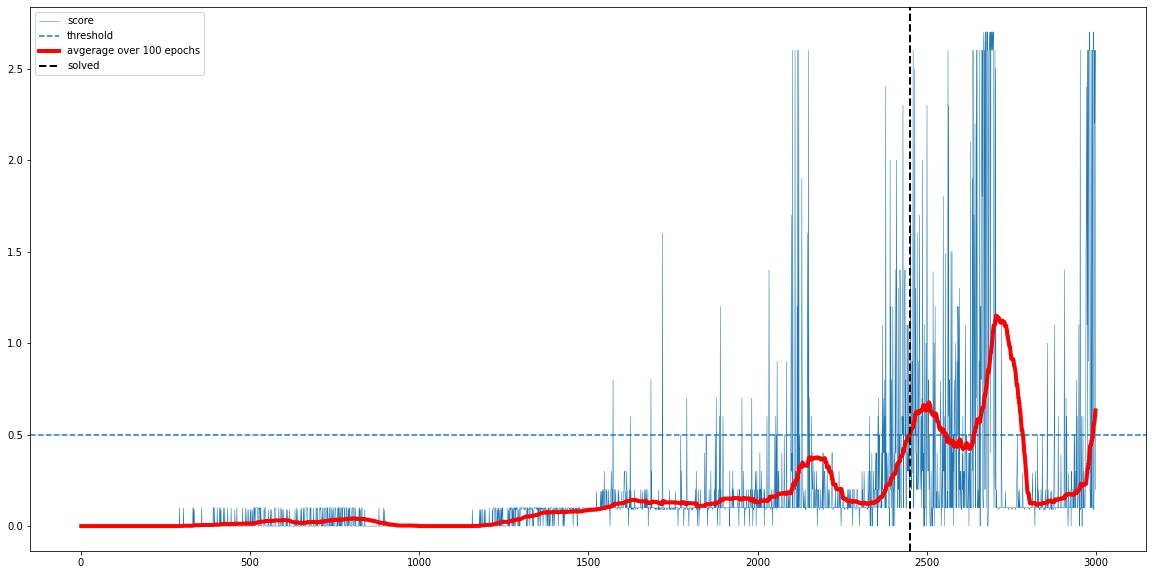

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(scores, label='score', linewidth=0.5)
plt.axhline(y=0.5, linestyle='dashed', label='threshold')
plt.plot(windowed_scores, c='red', linewidth=4, label='avgerage over 100 epochs')
plt.axvline(x=tag_point, linestyle='dashed', c='black', linewidth=2, label='solved')
plt.legend()

In [11]:
for i in range(50):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    while True:
        actions = agent.act(states);
        
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        scores += env_info.rewards
        states = next_states
        if np.any(dones):
            break
    print('Total score (average over agents) this episode: {}'.format(np.mean(scores)))

Total score (average over agents) this episode: 0.245000003837049
Total score (average over agents) this episode: 0.29500000458210707
Total score (average over agents) this episode: 0.1450000023469329
Total score (average over agents) this episode: 0.04500000085681677
Total score (average over agents) this episode: -0.004999999888241291
Total score (average over agents) this episode: 0.09500000160187483
Total score (average over agents) this episode: 0.6450000097975135
Total score (average over agents) this episode: 0.245000003837049
Total score (average over agents) this episode: 0.245000003837049
Total score (average over agents) this episode: 0.04500000085681677
Total score (average over agents) this episode: 0.04500000085681677
Total score (average over agents) this episode: 0.1450000023469329
Total score (average over agents) this episode: -0.004999999888241291
Total score (average over agents) this episode: 0.245000003837049
Total score (average over agents) this episode: 0.14000